In [5]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 상관분석

### 1. 
부품수리시간과 부품 수간에 관계를 분석하기 위한 상관분석을 하세요.

In [2]:
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

corr, p=stats.pearsonr(df1, df2)
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(p))

Correlation Analysis
corr: 0.989
p-value:0.000


> __결론 : 부품수리시간과 부품 수간에 "매우 강한 양의 상관성"이 있다고 할 수 있다.__

### 2.
초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.

In [3]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15,
       17, 14, 16, 20, 21]

corr, p=stats.pearsonr(df1, df2)
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(p))

Correlation Analysis
corr: -0.723
p-value:0.000


> __결론 : 초코칩의 강도와 재료 반죽 온도간에 음의 상관성이 있다고 할 수 있다.__

# 단순선형 회귀분석

In [7]:
# 데이터 구성: Series, DataFrame
import numpy as np
# 행렬 연산
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

### 1.
아래는 부품 수에 따른 수리 소요 시간 데이터이다.  
소요시간을 예측하기 위한 회귀분석을 실시하고 결과를 해석하시오.  
- 데이터 : 부품수리시간.CSV(변수:2개, 자료 수: 14개)

In [6]:
data = pd.read_csv("../data/부품수리시간.CSV", engine = "python")
data.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [7]:
# 요약통계량
data.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

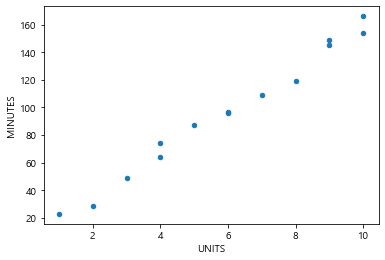

In [8]:
# 목표변수와 설명변수의 산점도
data.plot.scatter('UNITS', 'MINUTES')

> UNITS(설명변수)가 증가함에 따라 MINUTES(수리시간)도 증가

In [9]:
# 목표변수와 설명변수의 상관계수
data.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


> 두 변수간에 매우 높은 양의 상관관계가 있음

In [8]:
data=pd.DataFrame({'X':[-3, -2, -1, 0, 1, 2, 3],
                  'Y':[0.4, 1.3, 2.2, 2.5, 2.4, 2.0, 1.5]})
data

,X,Y
0,-3,0.4
1,-2,1.3
2,-1,2.2
3,0,2.5
4,1,2.4
5,2,2.0
6,3,1.5


In [9]:
reg_model=smf.ols(formula="Y~X", data=data)
reg_result=reg_model.fit()
reg_result.summary()

C:\Users\82105\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.729
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.246
Time:                        10:03:27   Log-Likelihood:                -6.3003
No. Observations:                   7   AIC:                             16.60
Df Residuals:                       5   BIC:                             16.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7571      0.266      6.602      0.001       1.073       2.441
X              0.1750      0.133      1.315      0.246      -0.167       0.517
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.778
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.673
Skew:                          -0.209   Prob(JB):                        0.714
Kurtosis:                       1.539   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


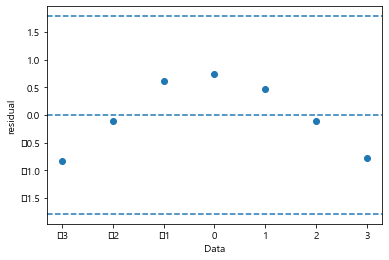

In [10]:
# 잔차의 독립성
plt.scatter(data['X'], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


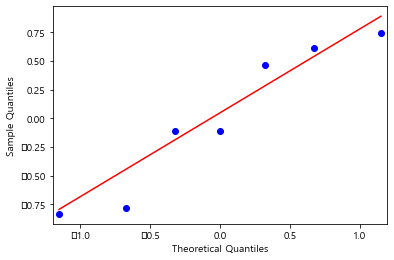

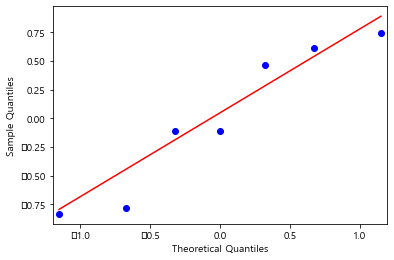

In [11]:
# 정규성검정
# 잔차 정규성 검정 : Q-Q plot, s-standardized line
# r-regression line, q-quartiles
qqplot(reg_result.resid, line="q")

In [11]:
# 선형 회귀 분석 : formula(y~X1+X2+...)이용.
# 상수항(Intercept)은 자동으로 추가됨
reg_model=smf.ols(formula="MINUTES~UNITS", data=data)
reg_result=reg_model.fit()
reg_result.summary()

C:\Users\82105\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           8.92e-13
Time:                        22:30:30   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
UNITS         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 1. 분산분석 결과 : p-value < 0.05 이므로 회귀모델로서 유의  
> 2. 설명력 : R = 0.987 이므로 UNITS로 MINUTES의 변동의 98.7%을 설명할 수 있음.  
> 3. 회귀계수 검정 : 절편의 유의성은 검토하지 않음 / UNITS의 p-value<0.05이므로 유의.  

- Omnibus/prob(Omnibus)/Jarque-Bera(JB) : 잔차의 정규성 검정 => p-vlaue>0.05 이므로 정규성을 가진다고 할 수 있음.
- Durbin-Watson : 잔차의 독립성 검정 => 4-> 음의 상관 / 2-> 독립 / 0-> 양의 상관

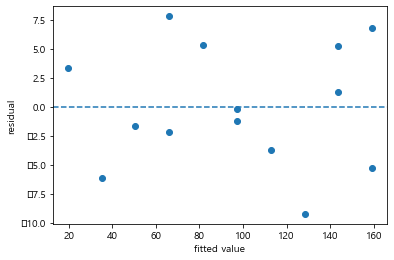

In [14]:
# 잔차의 등분산성: X-예측값,Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle='--')

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


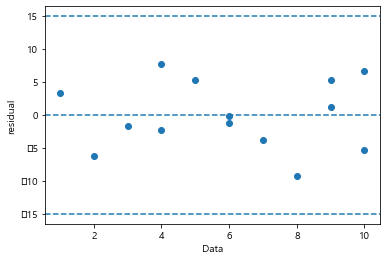

In [15]:
# 잔차의 독립성
plt.scatter(data['UNITS'], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


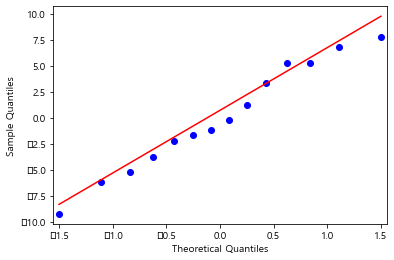

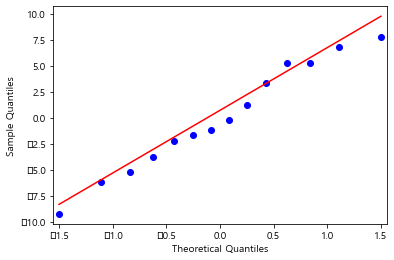

In [16]:
# 정규성검정
# 잔차 정규성 검정 : Q-Q plot, s-standardized line
# r-regression line, q-quartiles
qqplot(reg_result.resid, line="q")

In [18]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

C:\Users\82105\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

> p-value > 0.05 이므로 정규성을 가진다고 볼 수 있다.

> 최종 회귀식 : y_hat=4.1617 + 15.5088 * Units  
> => 부품 수가 1단위 증가할 때마다 수리 시간은 15.5분 증가

> Q : 부품의 수가 12개 일 때 예상 수리시간은?  
> A : y_hat=4.1617 + 15.5088 * 12 = 190.263 Minutes

### 2.
초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [19]:
data = pd.read_csv("../data/correlation.CSV", engine = "python")
df=data[['strength', 'b_time']]
df.head()

,strength,b_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [20]:
df.describe().round(3)

,strength,b_time
count,86.000,86.000
mean,32.192,0.675
std,3.290,0.071
min,27.000,0.540
25%,29.500,0.620
50%,31.000,0.654
75%,34.200,0.735
max,39.000,0.849


<AxesSubplot:xlabel='b_time', ylabel='strength'>

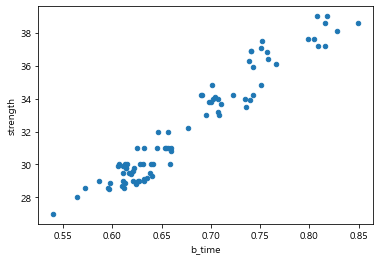

In [28]:
df.plot.scatter("b_time", "strength")

In [24]:
df.corr(method="pearson").round(3)

,strength,b_time
strength,1.000,0.966
b_time,0.966,1.000


In [29]:
reg_model=smf.ols(formula="strength~b_time", data=data)
reg_result=reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.60e-51
Time:                        23:03:55   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.020       0.343       3.863
b_time        44.5520      1.303     34.186      0.000      41.960      47.144
==============================================================================
Omnibus:                        5.137   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                2.908
Skew:                           0.228   Prob(JB):                        0.234
Kurtosis:                       2.223   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


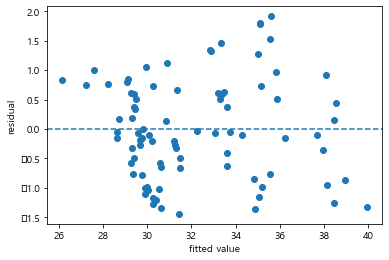

In [30]:
# 잔차의 등분산성: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

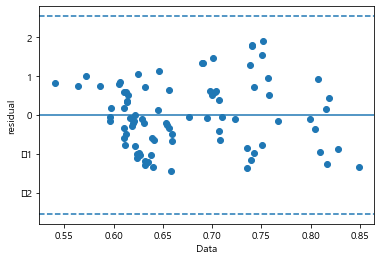

In [32]:
# 잔차의 독립성
plt.scatter(data["b_time"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


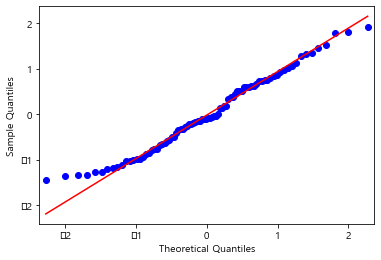

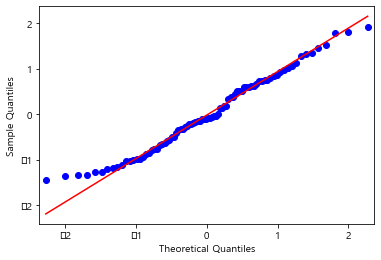

In [33]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

In [34]:
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=5.137339293334132, pvalue=0.0766374324997326)

> 최종 회귀식 : y_hat=2.1034 + 44.5520 * b_time  
> => 굽는 시간이 1단위 증가할 때마다 초코칩 강도는 44.5 증가